In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.api import VAR

import yfinance as yf

In [2]:
google = yf.Ticker("GOOG")
apple = yf.Ticker("AAPL")
microsoft = yf.Ticker("MSFT")
nvidia = yf.Ticker("NVDA")
amazon = yf.Ticker("AMZN")
meta = yf.Ticker("META")

google_data = google.history(start='2023-01-01', end='2024-01-01')
apple_data = apple.history(start='2023-01-01', end='2024-01-01')
microsoft_data = microsoft.history(start='2023-01-01', end='2024-01-01')
nvidia_data = nvidia.history(start='2023-01-01', end='2024-01-01')
amazon_data = amazon.history(start='2023-01-01', end='2024-01-01')
meta_data = meta.history(start='2023-01-01', end='2024-01-01')

In [3]:
apple_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-03 00:00:00-05:00,129.215478,129.830407,123.155402,124.048050,112117500,0.0,0.0
2023-01-04 00:00:00-05:00,125.853175,127.608717,124.057967,125.327507,89113600,0.0,0.0
2023-01-05 00:00:00-05:00,126.091211,126.725981,123.740581,123.998451,80962700,0.0,0.0
2023-01-06 00:00:00-05:00,124.980357,129.225376,123.869506,128.560852,87754700,0.0,0.0
2023-01-09 00:00:00-05:00,129.403940,132.319920,128.828678,129.086548,70790800,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,194.667221,194.896627,192.463035,193.091385,37122800,0.0,0.0
2023-12-26 00:00:00-05:00,193.101358,193.380621,192.323408,192.542831,28919300,0.0,0.0
2023-12-27 00:00:00-05:00,191.984293,192.991634,190.587962,192.642548,48087700,0.0,0.0


In [4]:
close_df = pd.DataFrame()
close_df["Apple"] = apple_data.Close
close_df["Google"] = google_data.Close
close_df["Microsoft"] = microsoft_data.Close
close_df["Nvidia"] = nvidia_data.Close
close_df["Amazon"] = amazon_data.Close
close_df["Meta"] = meta_data.Close
close_df["Apple_Volume"] = apple_data.Volume
close_df

,Apple,Google,Microsoft,Nvidia,Amazon,Meta,Apple_Volume
Date,,,,,,,
2023-01-03 00:00:00-05:00,124.048050,89.699997,236.609253,143.079773,85.820000,124.607788,112117500
2023-01-04 00:00:00-05:00,125.327507,88.709999,226.259186,147.417679,85.139999,127.235008,89113600
2023-01-05 00:00:00-05:00,123.998451,86.769997,219.553360,142.580048,83.120003,126.805458,80962700
2023-01-06 00:00:00-05:00,128.560852,88.160004,222.140884,148.517120,86.080002,129.882202,87754700
2023-01-09 00:00:00-05:00,129.086548,88.800003,224.303726,156.203354,87.360001,129.332779,70790800
...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,193.091385,142.720001,373.215393,488.277069,153.419998,353.015472,37122800
2023-12-26 00:00:00-05:00,192.542831,142.820007,373.295135,492.766907,153.410004,354.453918,28919300
2023-12-27 00:00:00-05:00,192.642548,141.440002,372.707275,494.146820,153.339996,357.450714,48087700


In [48]:
close_df

,Apple,Google,Microsoft,Nvidia,Amazon,Meta,Apple_Volume,Missing
Date,,,,,,,,
2023-01-03 00:00:00-05:00,124.048050,89.699997,236.609207,143.079788,85.820000,124.607788,112117500,124.048050
2023-01-04 00:00:00-05:00,125.327515,88.709999,226.259186,147.417694,85.139999,127.235008,89113600,125.327515
2023-01-05 00:00:00-05:00,123.998459,86.769997,219.553375,142.580032,83.120003,126.805458,80962700,123.998459
2023-01-06 00:00:00-05:00,128.560867,88.160004,222.140884,148.517120,86.080002,129.882202,87754700,128.560867
2023-01-09 00:00:00-05:00,129.086548,88.800003,224.303711,156.203354,87.360001,129.332779,70790800,129.086548
...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,193.091385,142.720001,373.215393,488.277069,153.419998,353.015472,37122800,193.091385
2023-12-26 00:00:00-05:00,192.542831,142.820007,373.295135,492.766907,153.410004,354.453918,28919300,192.542831
2023-12-27 00:00:00-05:00,192.642548,141.440002,372.707275,494.146820,153.339996,357.450714,48087700,192.642548


In [54]:
help(sns.scatterplot)

Help on function scatterplot in module seaborn.relational:

scatterplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, legend='auto', ax=None, **kwargs)
    Draw a scatter plot with possibility of several semantic groupings.
    
    The relationship between `x` and `y` can be shown for different subsets
    of the data using the `hue`, `size`, and `style` parameters. These
    parameters control what visual semantics are used to identify the different
    subsets. It is possible to show up to three dimensions independently by
    using all three semantic types, but this style of plot can be hard to
    interpret and is often ineffective. Using redundant semantics (i.e. both
    `hue` and `style` for the same variable) can be helpful for making
    graphics more accessible.
    
    See the :ref:`tutorial <relational_tutorial>` for more information.


<Axes: xlabel='Apple_Volume', ylabel='Apple'>

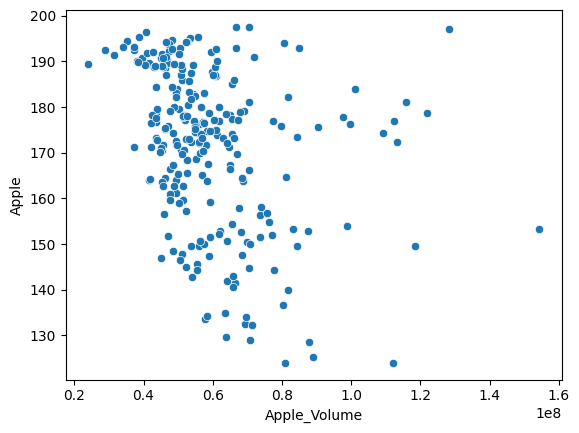

In [57]:
import seaborn as sns

sns.scatterplot(data = close_df, y="Apple", x="Apple_Volume")

In [50]:
close_df[["Apple", "Apple_Volume"]].corr()

,Apple,Apple_Volume
Apple,1.000000,-0.321075
Apple_Volume,-0.321075,1.000000


In [65]:
list(close_df[["Apple"]].diff()[1:])

['Apple']

In [76]:
np.corrcoef(list(close_df[["Apple"]].diff()[1:]["Apple"]), list(close_df[["Apple_Volume"]].diff()[1:]["Apple_Volume"]))

array([[1.        , 0.03111151],
       [0.03111151, 1.        ]])

Note that the volume has a negative correlation with the stock closing prices

Actual prices have strong correlation among themselves but the price mevements themselves do have have that strong a correlation.

<Axes: xlabel='Date'>

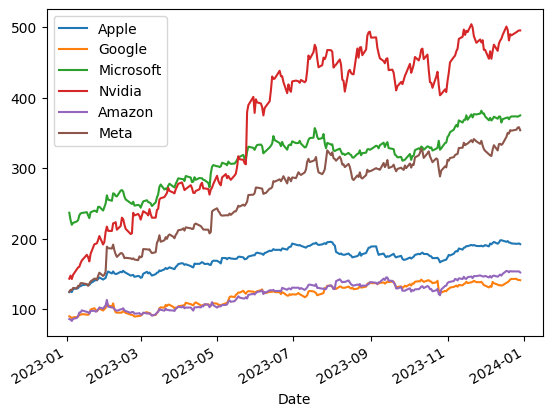

In [8]:
close_df.drop(columns=["Apple_Volume"]).plot()

# Multiple (10 equispaced) windows of five missing elements

In [9]:
len(close_df)

250

In [5]:
def generate_equi_spaced_intervals(start, end, num_intervals, interval_length):
    total_range = end - start + 1
    step = total_range // (num_intervals - 1)
    intervals = []
    for i in range(num_intervals):
        interval_start = start + i * step
        interval_end = min(interval_start + interval_length - 1, end)
        intervals.append((interval_start, interval_end))
    return intervals

In [6]:
start = 0
end = 249
num_intervals = 10
interval_length = 5

intervals = generate_equi_spaced_intervals(start, end, num_intervals, interval_length)
for interval in intervals:
    print(interval)

(0, 4)
(27, 31)
(54, 58)
(81, 85)
(108, 112)
(135, 139)
(162, 166)
(189, 193)
(216, 220)
(243, 247)


In [12]:
intervals[1:-1]

[(27, 31),
 (54, 58),
 (81, 85),
 (108, 112),
 (135, 139),
 (162, 166),
 (189, 193),
 (216, 220)]

In [14]:
close_df["Missing"] = close_df["Apple"]
for interval in intervals[1:-1]:
    close_df["Missing"][interval[0]:interval[1]+1] = np.nan

/var/folders/xf/nrh10nbn72g0qqwyvykmn5qh0000gp/T/ipykernel_31524/1839078536.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_df["Missing"][interval[0]:interval[1]+1] = np.nan
/var/folders/xf/nrh10nbn72g0qqwyvykmn5qh0000gp/T/ipykernel_31524/1839078536.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_df["Missing"][interval[0]:interval[1]+1] = np.nan
/var/folders/xf/nrh10nbn72g0qqwyvykmn5qh0000gp/T/ipykernel_31524/1839078536.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [16]:
len(close_df[close_df["Missing"].isna()])

40

In [17]:
close_df

,Apple,Google,Microsoft,Nvidia,Amazon,Meta,Apple_Volume,Missing
Date,,,,,,,,
2023-01-03 00:00:00-05:00,124.048050,89.699997,236.609207,143.079788,85.820000,124.607788,112117500,124.048050
2023-01-04 00:00:00-05:00,125.327515,88.709999,226.259186,147.417694,85.139999,127.235008,89113600,125.327515
2023-01-05 00:00:00-05:00,123.998459,86.769997,219.553375,142.580032,83.120003,126.805458,80962700,123.998459
2023-01-06 00:00:00-05:00,128.560867,88.160004,222.140884,148.517120,86.080002,129.882202,87754700,128.560867
2023-01-09 00:00:00-05:00,129.086548,88.800003,224.303711,156.203354,87.360001,129.332779,70790800,129.086548
...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,193.091385,142.720001,373.215393,488.277069,153.419998,353.015472,37122800,193.091385
2023-12-26 00:00:00-05:00,192.542831,142.820007,373.295135,492.766907,153.410004,354.453918,28919300,192.542831
2023-12-27 00:00:00-05:00,192.642548,141.440002,372.707275,494.146820,153.339996,357.450714,48087700,192.642548


<Axes: xlabel='Date'>

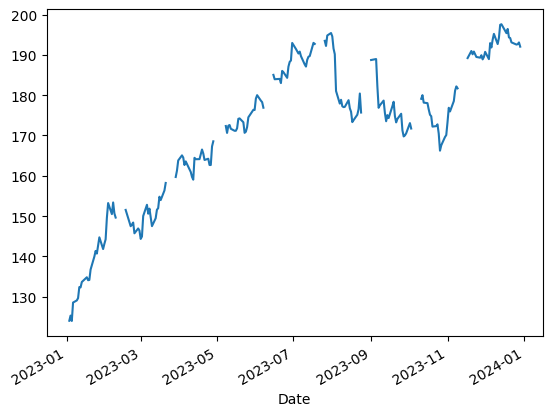

In [18]:
close_df.Missing.plot()

In [19]:
close_df_filled = close_df.copy()
close_df_filled["VAR_Imputation"] = close_df_filled["Missing"].interpolate()
close_df_filled

,Apple,Google,Microsoft,Nvidia,Amazon,Meta,Apple_Volume,Missing,VAR_Imputation
Date,,,,,,,,,
2023-01-03 00:00:00-05:00,124.048050,89.699997,236.609207,143.079788,85.820000,124.607788,112117500,124.048050,124.048050
2023-01-04 00:00:00-05:00,125.327515,88.709999,226.259186,147.417694,85.139999,127.235008,89113600,125.327515,125.327515
2023-01-05 00:00:00-05:00,123.998459,86.769997,219.553375,142.580032,83.120003,126.805458,80962700,123.998459,123.998459
2023-01-06 00:00:00-05:00,128.560867,88.160004,222.140884,148.517120,86.080002,129.882202,87754700,128.560867,128.560867
2023-01-09 00:00:00-05:00,129.086548,88.800003,224.303711,156.203354,87.360001,129.332779,70790800,129.086548,129.086548
...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,193.091385,142.720001,373.215393,488.277069,153.419998,353.015472,37122800,193.091385,193.091385
2023-12-26 00:00:00-05:00,192.542831,142.820007,373.295135,492.766907,153.410004,354.453918,28919300,192.542831,192.542831
2023-12-27 00:00:00-05:00,192.642548,141.440002,372.707275,494.146820,153.339996,357.450714,48087700,192.642548,192.642548


In [22]:
close_df_filled

,Apple,Google,Microsoft,Nvidia,Amazon,Meta,Apple_Volume,Missing,VAR_Imputation
Date,,,,,,,,,
2023-01-03 00:00:00-05:00,124.048050,89.699997,236.609207,143.079788,85.820000,124.607788,112117500,124.048050,124.048050
2023-01-04 00:00:00-05:00,125.327515,88.709999,226.259186,147.417694,85.139999,127.235008,89113600,125.327515,125.327515
2023-01-05 00:00:00-05:00,123.998459,86.769997,219.553375,142.580032,83.120003,126.805458,80962700,123.998459,123.998459
2023-01-06 00:00:00-05:00,128.560867,88.160004,222.140884,148.517120,86.080002,129.882202,87754700,128.560867,128.560867
2023-01-09 00:00:00-05:00,129.086548,88.800003,224.303711,156.203354,87.360001,129.332779,70790800,129.086548,129.086548
...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,193.091385,142.720001,373.215393,488.277069,153.419998,353.015472,37122800,193.091385,193.091385
2023-12-26 00:00:00-05:00,192.542831,142.820007,373.295135,492.766907,153.410004,354.453918,28919300,192.542831,192.542831
2023-12-27 00:00:00-05:00,192.642548,141.440002,372.707275,494.146820,153.339996,357.450714,48087700,192.642548,192.642548


In [13]:
close_df_filled.drop(columns=["Google", "Microsoft", "Nvidia", "Amazon", "Meta"], inplace=True)
close_df_filled

,Apple,Microsoft,Missing,VAR_Imputation
Date,,,,
2023-01-03 00:00:00-05:00,124.048050,236.609222,124.048050,124.048050
2023-01-04 00:00:00-05:00,125.327507,226.259186,125.327507,125.327507
2023-01-05 00:00:00-05:00,123.998444,219.553360,123.998444,123.998444
2023-01-06 00:00:00-05:00,128.560883,222.140884,128.560883,128.560883
2023-01-09 00:00:00-05:00,129.086533,224.303696,129.086533,129.086533
...,...,...,...,...
2023-12-22 00:00:00-05:00,193.091385,373.215393,193.091385,193.091385
2023-12-26 00:00:00-05:00,192.542816,373.295135,192.542816,192.542816
2023-12-27 00:00:00-05:00,192.642548,372.707275,192.642548,192.642548


<Axes: xlabel='Date'>

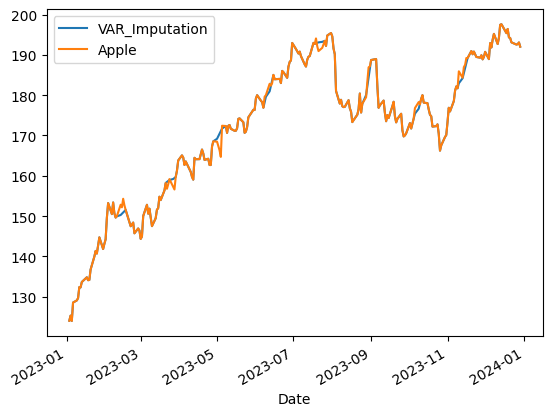

In [20]:
close_df_filled[["VAR_Imputation", "Apple"]].plot()

We do interpolation in order to prepare the data for VAR model (forward fill to handle initial NaNs if necessary)

In [31]:
# Fit the VAR model
model_2 = VAR(close_df_filled.drop(columns = ["Apple", "Google", "Microsoft", "Nvidia", "Amazon", "Meta", "Missing"]))
results_2 = model_2.fit(maxlags=10, ic='aic')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


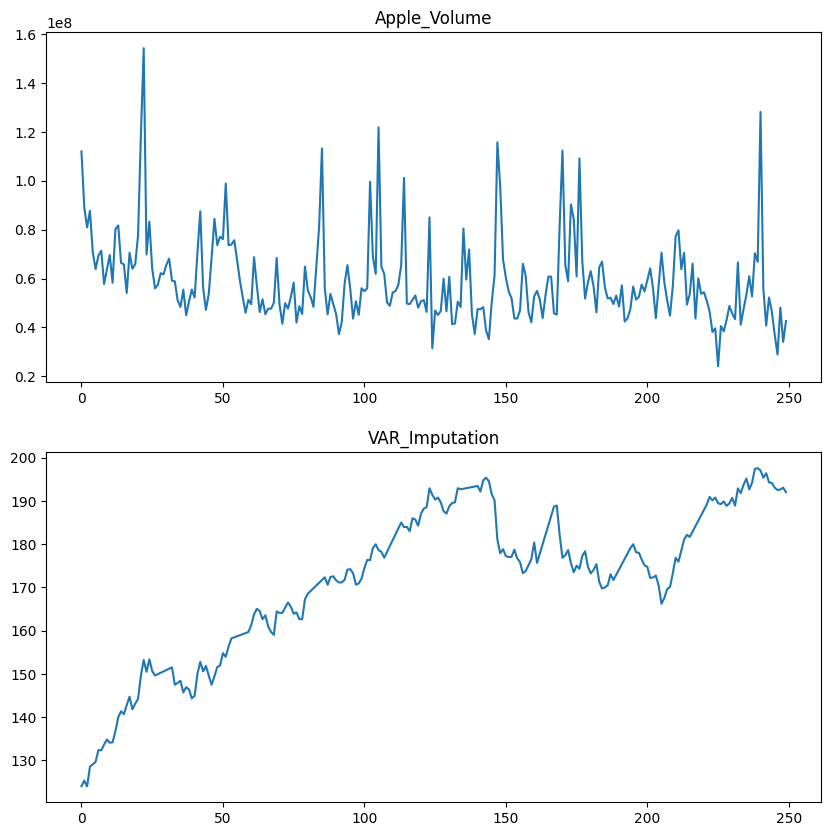

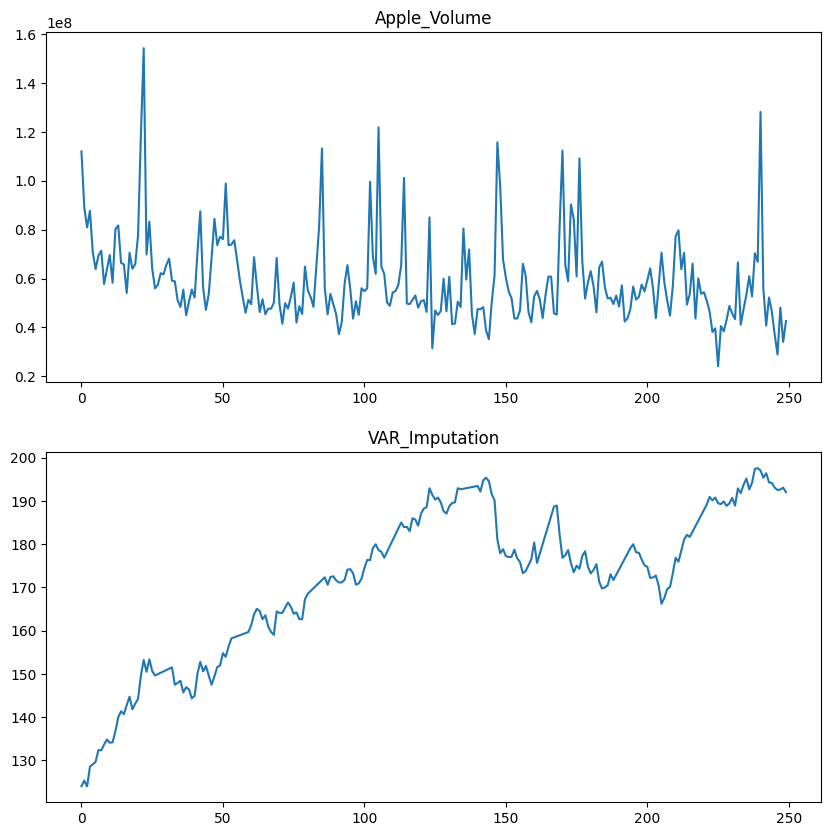

In [32]:
results_2.plot()

In [79]:
del imputed_data

In [44]:
close_df

,Apple,Google,Microsoft,Nvidia,Amazon,Meta,Apple_Volume,Missing
Date,,,,,,,,
2023-01-03 00:00:00-05:00,124.048050,89.699997,236.609207,143.079788,85.820000,124.607788,112117500,124.048050
2023-01-04 00:00:00-05:00,125.327515,88.709999,226.259186,147.417694,85.139999,127.235008,89113600,125.327515
2023-01-05 00:00:00-05:00,123.998459,86.769997,219.553375,142.580032,83.120003,126.805458,80962700,123.998459
2023-01-06 00:00:00-05:00,128.560867,88.160004,222.140884,148.517120,86.080002,129.882202,87754700,128.560867
2023-01-09 00:00:00-05:00,129.086548,88.800003,224.303711,156.203354,87.360001,129.332779,70790800,129.086548
...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,193.091385,142.720001,373.215393,488.277069,153.419998,353.015472,37122800,193.091385
2023-12-26 00:00:00-05:00,192.542831,142.820007,373.295135,492.766907,153.410004,354.453918,28919300,192.542831
2023-12-27 00:00:00-05:00,192.642548,141.440002,372.707275,494.146820,153.339996,357.450714,48087700,192.642548


In [34]:
# Forecast missing values
def impute_missing_values(data, results):
    for i in range(len(data)):
        if np.isnan(data["Missing"].iloc[i]):  # Check if the stock price is np.nan
            # Get the previous available data points up to the maxlags
            data_slice = data.iloc[i - results.k_ar:i].values
            if len(data_slice) == results.k_ar:
                forecast = results.forecast(data_slice, steps=1)
                data["Missing"].iloc[i] = forecast[0, 0]  # Impute the missing value using the forecast
    return data

# Impute the missing values
imputed_data_2 = impute_missing_values(close_df.drop(columns=["Apple", "Google", "Microsoft", "Nvidia", "Amazon", "Meta"]).copy(), results_1)

/var/folders/xf/nrh10nbn72g0qqwyvykmn5qh0000gp/T/ipykernel_31524/1242947101.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Missing"].iloc[i] = forecast[0, 0]  # Impute the missing value using the forecast
/var/folders/xf/nrh10nbn72g0qqwyvykmn5qh0000gp/T/ipykernel_31524/1242947101.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Missing"].iloc[i] = forecast[0, 0]  # Impute the missing value using the forecast
/var/folders/xf/nrh10nbn72g0qqwyvykmn5qh0000gp/T/ipykernel_31524/1242947101.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in t

In [35]:
imputed_data_2

,Apple_Volume,Missing
Date,,
2023-01-03 00:00:00-05:00,112117500,124.048050
2023-01-04 00:00:00-05:00,89113600,125.327515
2023-01-05 00:00:00-05:00,80962700,123.998459
2023-01-06 00:00:00-05:00,87754700,128.560867
2023-01-09 00:00:00-05:00,70790800,129.086548
...,...,...
2023-12-22 00:00:00-05:00,37122800,193.091385
2023-12-26 00:00:00-05:00,28919300,192.542831
2023-12-27 00:00:00-05:00,48087700,192.642548


In [21]:
close_df_filled

,Apple,Microsoft,Missing,VAR_Imputation
Date,,,,
2023-01-03 00:00:00-05:00,124.048050,236.609222,124.048050,124.048050
2023-01-04 00:00:00-05:00,125.327507,226.259186,125.327507,125.327507
2023-01-05 00:00:00-05:00,123.998444,219.553360,123.998444,123.998444
2023-01-06 00:00:00-05:00,128.560883,222.140884,128.560883,128.560883
2023-01-09 00:00:00-05:00,129.086533,224.303696,129.086533,129.086533
...,...,...,...,...
2023-12-22 00:00:00-05:00,193.091385,373.215393,193.091385,193.091385
2023-12-26 00:00:00-05:00,192.542816,373.295135,192.542816,192.542816
2023-12-27 00:00:00-05:00,192.642548,372.707275,192.642548,192.642548


In [28]:
imputed_data[imputed_data["Missing"].isna()]

,Apple,Apple_Volume,Missing
Date,,,


<Axes: xlabel='Date'>

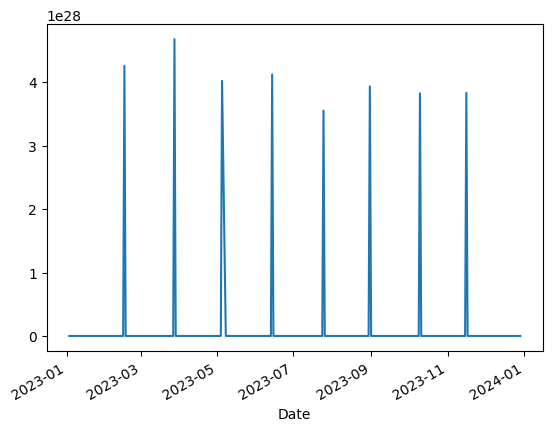

In [40]:
imputed_data_2["Missing"].plot()

<Axes: xlabel='Date'>

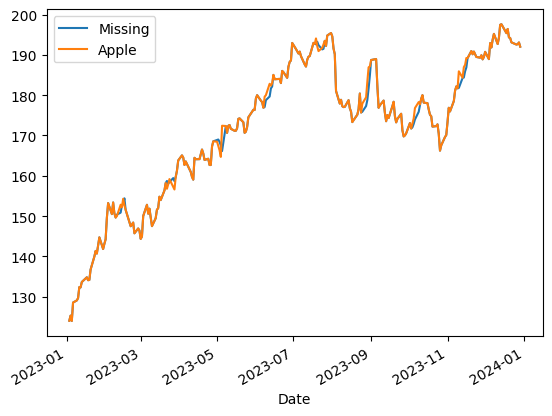

In [29]:
imputed_data[["Missing", "Apple"]].plot()

<Axes: xlabel='Date'>

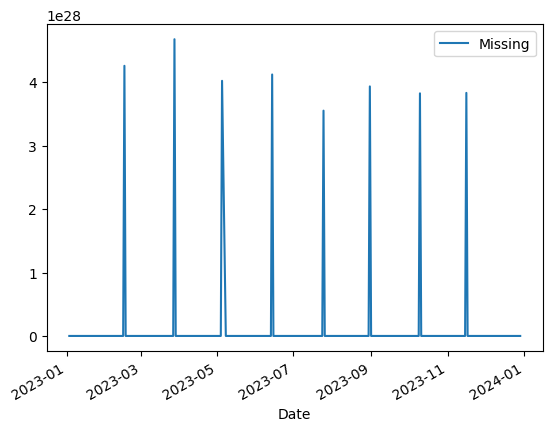

In [36]:
imputed_data_2[["Missing"]].plot()

In [30]:
print(mean_squared_error(imputed_data["Missing"], imputed_data["Apple"])*(len(close_df)/40))
print(mean_squared_error(close_df["Missing"].interpolate(method='linear'), close_df["Apple"])*(len(close_df)/40))

5.350763925794135
3.6319977881763608


In [ ]:
print(mean_squared_error(imputed_data["Missing"], imputed_data["Apple"])*(len(close_df)/40))
print(mean_squared_error(close_df["Missing"].interpolate(method='linear'), close_df["Apple"])*(len(close_df)/40))